## Astropy Visualization

### Making plots with World Coordinates (in this case, galactic coordinates)

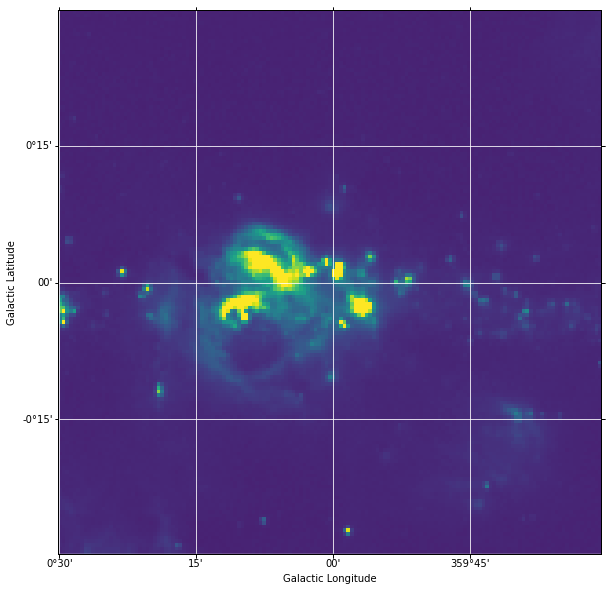

In [2]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.figure(figsize=(20,10))
plt.subplot(projection=wcs)

plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

### Overlay FK5 Equatorial Coordinates

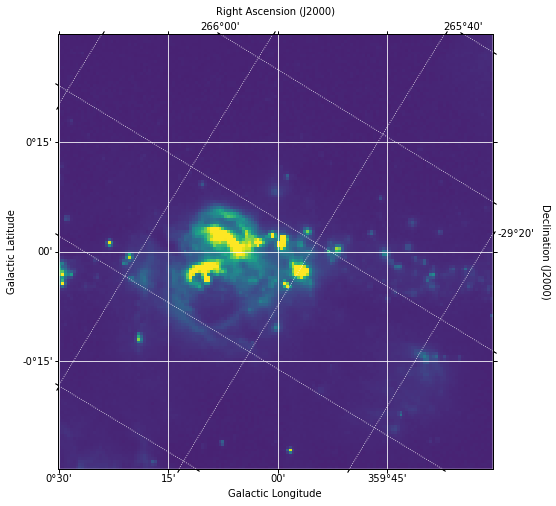

In [3]:
ax = plt.subplot(projection=wcs)

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

fig = plt.gcf()
fig.set_size_inches(11,8)

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

### Matplotlib normalization

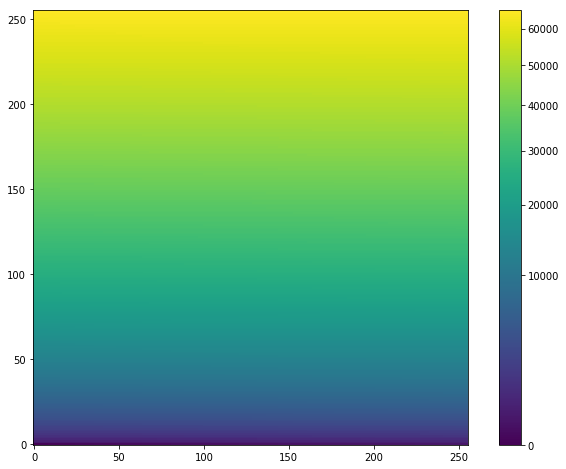

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

# Generate a test image
image = np.arange(65536).reshape((256, 256))

# Create an ImageNormalize object
norm = ImageNormalize(image, interval=MinMaxInterval(),
                      stretch=SqrtStretch())

# or equivalently using positional arguments
# norm = ImageNormalize(image, MinMaxInterval(), SqrtStretch())

# Display the image
fig = plt.figure()
fig.set_size_inches(11,8)
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(image, origin='lower', norm=norm)
fig.colorbar(im)

### Creating color RGB images using Lupton scheme.

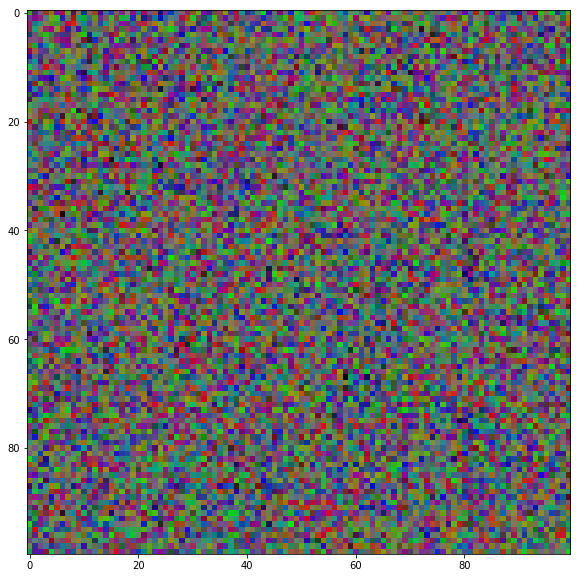

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
image_r = np.random.random((100,100))
image_g = np.random.random((100,100))
image_b = np.random.random((100,100))
image = make_lupton_rgb(image_r, image_g, image_b, stretch=0.5)
plt.figure(figsize=(20,10))
plt.imshow(image)

### Next, with Slone Digital Sky Survey data.

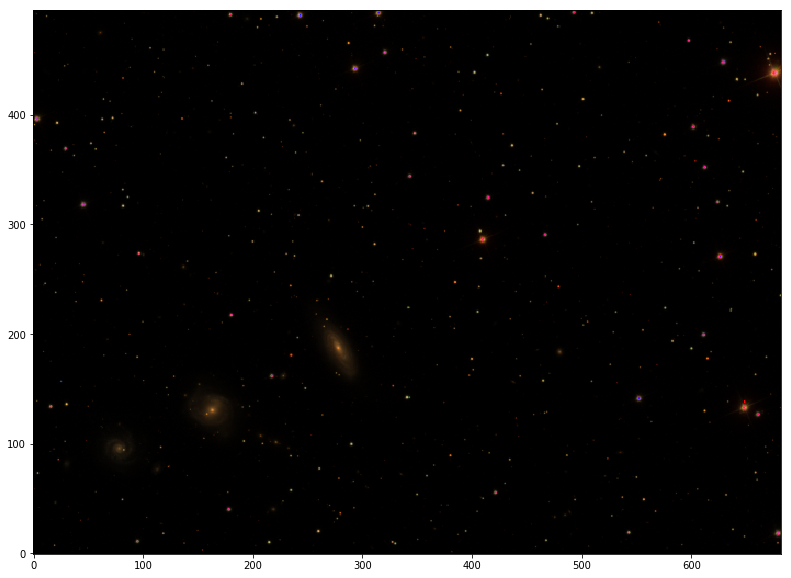

In [7]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# Read in the three images downloaded from here:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data

rgb_default = make_lupton_rgb(i, r, g, filename="ngc6976-default.jpeg")
plt.figure(figsize=(20,10))

plt.imshow(rgb_default, origin='lower')

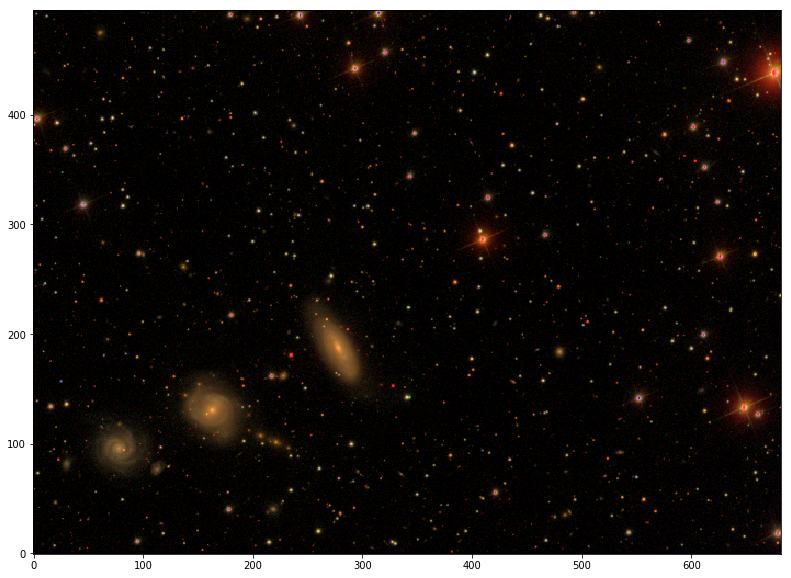

In [8]:
rgb = make_lupton_rgb(i, r, g, Q=10, stretch=0.5, filename="ngc6976.jpeg")
plt.figure(figsize=(20,10))
plt.imshow(rgb, origin='lower')